In [2]:
%matplotlib inline
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
import seaborn as sns

sns.set(rc={"figure.figsize": (9, 5)})
sns.set_style("whitegrid")

In [3]:
def get_year_data_dt(year):
    FILE = '../Сводная вегетация.xlsx'
    SHEET = year

    df = pd.read_excel(FILE, sheetname=SHEET, header=1)

    NDVI_COLUMNS = [col for col in df.columns if 'неделя' in col]
    CULTURE_COLUMN = 'Культура ' + SHEET
    YIELD_COLUMN = 'Урожайность, т./га.'

    df_cultures = df.groupby(df[CULTURE_COLUMN]).mean()
    df_cultures = df_cultures[df_cultures[YIELD_COLUMN].notnull()]
    yield_by_culture = df_cultures[YIELD_COLUMN]
    df_cultures = df_cultures[NDVI_COLUMNS]
    
    df_cultures = df_cultures.apply(lambda x: x.interpolate(method='linear'), axis=1)
    df_cultures = df_cultures.apply(lambda x: x.fillna(x[x.first_valid_index()]), axis=1)
    df_cultures = df_cultures[df_cultures.columns[::-1]]
    df_cultures.columns = pd.date_range(start='2014-01-06', end='2014-12-29', freq='W-MON')
    df_cultures['yield'] = yield_by_culture
    return df_cultures

In [86]:
def get_year_data_ind(year):
    FILE = '../Сводная вегетация.xlsx'
    SHEET = str(year)

    df = pd.read_excel(FILE, sheetname=SHEET, header=1)

    NDVI_COLUMNS = [col for col in df.columns if 'неделя' in col]
    CULTURE_COLUMN = 'Культура ' + SHEET
    YIELD_COLUMN = 'Урожайность, т./га.'

    df_cultures = df.groupby(df[CULTURE_COLUMN]).mean()
    #df_cultures = df_cultures[df_cultures[YIELD_COLUMN].notnull()]
    yield_by_culture = df_cultures[YIELD_COLUMN]
    df_cultures = df_cultures[NDVI_COLUMNS]

    df_cultures = df_cultures[df_cultures.columns[::-1]]
    df_cultures = df_cultures[df_cultures.columns[:52]]
    df_cultures.columns = range(1, 53)
    df_cultures = df_cultures.apply(lambda x: x.T.interpolate(method='linear'), axis=1)
    df_cultures = df_cultures.apply(lambda x: x.fillna(x[x.first_valid_index()]), axis=1)
    
    return df_cultures

In [87]:
def get_mean_week_ndvi():
    FILE = '../Сводная вегетация.xlsx'
    df_list = []
    for i in range(2013,2016):
        SHEET = str(i)

        df = pd.read_excel(FILE, sheetname=SHEET, header=1)
        NDVI_COLUMNS = [col for col in df.columns if 'неделя' in col]
        CULTURE_COLUMN = 'Культура ' + SHEET

        df_cultures = df.groupby(df[CULTURE_COLUMN]).mean()
        df_cultures = df_cultures[NDVI_COLUMNS]

        df_cultures = df_cultures[df_cultures.columns[::-1]]
        df_cultures = df_cultures[df_cultures.columns[:52]]
        df_cultures.columns = range(1, 53)
        df_cultures = df_cultures.apply(lambda x: x.T.interpolate(method='linear'), axis=1)
        df_cultures = df_cultures.apply(lambda x: x.fillna(x[x.first_valid_index()]), axis=1)
        
        df_list.append(df_cultures)
    
    return df_list

In [88]:
def culture_year_ndvi(year, culture):
    FILE = '../Сводная вегетация.xlsx'
    SHEET = str(year)
    culture = culture
    df = pd.read_excel(FILE, sheetname=SHEET, header=1)

    NDVI_COLUMNS = [col for col in df.columns if 'неделя' in col]
    #NDVI_COLUMNS = [x for x in NDVI_COLUMNS if x <='неделя 51']
    CULTURE_COLUMN = 'Культура ' + SHEET
    YIELD_COLUMN = 'Урожайность, т./га.'

    df_cultures = df[df[CULTURE_COLUMN] == culture]
    df_cultures = df_cultures[df_cultures[YIELD_COLUMN].notnull()]
    yield_by_culture = df_cultures[YIELD_COLUMN]
    df_cultures = df_cultures[NDVI_COLUMNS]

    df_cultures = df_cultures.apply(lambda x: x.interpolate(method='linear'), axis=1)
    df_cultures = df_cultures.apply(lambda x: x.fillna(x[x.first_valid_index()]), axis=1)
    df_cultures = df_cultures[df_cultures.columns[::-1]]
    df_cultures = df_cultures[df_cultures.columns[:52]]
    df_cultures.columns = pd.date_range(start=SHEET+'-01-03', end=SHEET+'-12-31', freq='W-MON')
    df_cultures['yield'] = yield_by_culture
    df_cultures = df_cultures.reset_index()
    
    return df_cultures

In [89]:
#generate every year data for sunflower
# for i in range(2012,2016):
#     df=culture_year_ndvi(i, 'Подсолнечник')
#     df.to_csv('Sunflower_'+str(i)+'.csv')

In [90]:
def whole_data_culture_ndvi():
    p = pd.Panel({n: df for n, df in enumerate(get_mean_week_ndvi())})
    p = p.mean(axis=0)
    return p

In [91]:
def plot_ndvi(culture, year):
    df = get_year_data_ind(year)
    yt = df.loc[culture].values
    xt = range(1, 53)
    
    plt.plot(xt, yt)

In [92]:
def plot_mean_ndvi(culture):
    df = whole_data_culture_ndvi()
    yt = df.loc[culture].values
    xt = range(1, 53)
    plt.plot(xt, yt)
    coeff = poly.polyfit(x=xt, y=yt, deg=18)
    x_new = np.linspace(xt[0], xt[-1], num=len(xt))
    ffit = poly.polyval(x_new, coeff)
    plt.plot(x_new, ffit)

/home/yura/Programs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  


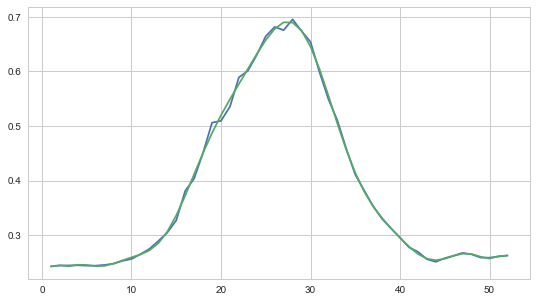

In [31]:
# for i in range(2013, 2016):
#     plot_ndvi('Кукуруза', i)

plot_mean_ndvi('Кукуруза')

In [93]:
cult_list = ['Подсолнечник', 'Ячмень озимый', 'Кукуруза',
       'Пшеница озимая', 'Пар', 'Сорго', 'Ячмень яровой', 'Рапс озимый',
       'Соя', 'Горох']
YEARS = [2012, 2013, 2014, 2015, 2016]
YEARS1 = [2013, 2014, 2015, 2016]
FILE = '../Сводная вегетация.xlsx'

In [94]:
def get_year_culture_week_ndvi():
    data = pd.DataFrame(columns = ['year', 'culture', 'week', 'ndvi'])
    
    for year in YEARS:
        df = pd.read_excel(FILE, sheetname=str(year), header=1)

        ndvi_columns = [col for col in df.columns if 'неделя' in col]
        culture_column = 'Культура ' + str(year)
        interesting_columns = [culture_column], ndvi_columns
        
        df = df[[culture_column] + ndvi_columns]
        data_array = []
        
        for i in range(df.shape[0]):
            for j in range(1, df.shape[1]):
                culture = df.iloc[i][culture_column]
                week = int(df.columns[j].replace('неделя ', ''))
                ndvi = df.iloc[i, j]
                
                row = [year, culture, week, ndvi]
                data_array.append(row)
                
        data_array = np.array(data_array)
        data_frame = pd.DataFrame(data_array, columns=data.columns)
        data = pd.concat([data, data_frame[data_frame['ndvi'] != 'nan']])
        
    return data

/home/yura/Programs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  del sys.path[0]


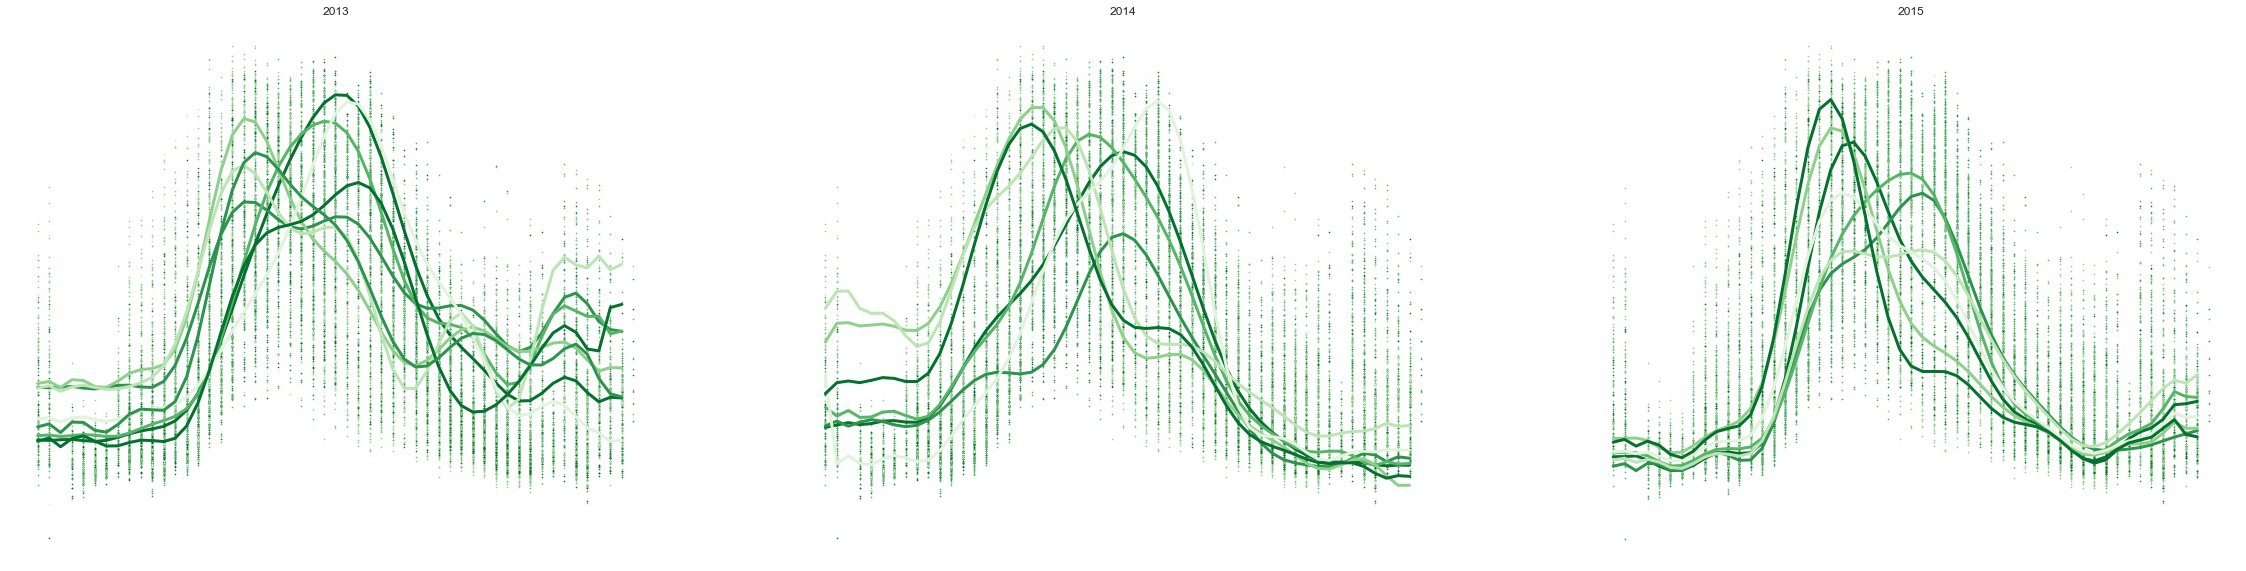

In [115]:
sns.set(rc={"figure.figsize": (40, 10)})
sns.set_style('white')
sns.set_palette('Greens_r')

dfs = get_year_culture_week_ndvi()
dfs['year'] = dfs['year'].astype(int)
dfs['week'] = dfs['week'].astype(int)
dfs['ndvi'] = dfs['ndvi'].astype(float)
y_test = dfs['ndvi']
dfs = dfs[['culture', 'week']]

fig, axes = plt.subplots(1, 3)
df = whole_data_culture_ndvi()
# for i in range(2):
#     for j in range(3):
for year in range(2013, 2016):
    df = get_year_data_ind(year)
    for cult in df.index:
        yt = df.loc[cult].values
        xt = range(1, 53)

        coeff = poly.polyfit(x=xt, y=yt, deg=18)
        x_new = np.linspace(xt[0], xt[-1], num=len(xt))
        ffit = poly.polyval(x_new, coeff)
        j=year%2013
        axes[j].scatter(dfs[dfs['culture'] == cult]['week'], y_test[dfs['culture'] == cult], s=1.5)
        axes[j].plot(xt, ffit, linewidth=3)
        axes[j].set_title(str(year))
        axes[j].get_xaxis().set_visible(False)
        axes[j].get_yaxis().set_visible(False)

sns.despine(left=True, bottom=True)
plt.savefig('../img/CURRRRVA.png')

In [ ]:
def get_year_data_ind(year):
    FILE = '../Сводная вегетация.xlsx'
    SHEET = str(year)

    df = pd.read_excel(FILE, sheetname=SHEET, header=1)

    NDVI_COLUMNS = [col for col in df.columns if 'неделя' in col]
    CULTURE_COLUMN = 'Культура ' + SHEET
    YIELD_COLUMN = 'Урожайность, т./га.'

    df_cultures = df.groupby(df[CULTURE_COLUMN]).mean()
    #df_cultures = df_cultures[df_cultures[YIELD_COLUMN].notnull()]
    yield_by_culture = df_cultures[YIELD_COLUMN]
    df_cultures = df_cultures[NDVI_COLUMNS]

    df_cultures = df_cultures[df_cultures.columns[::-1]]
    df_cultures = df_cultures[df_cultures.columns[:52]]
    df_cultures.columns = range(1, 53)
    df_cultures = df_cultures.apply(lambda x: x.T.interpolate(method='linear'), axis=1)
    df_cultures = df_cultures.apply(lambda x: x.fillna(x[x.first_valid_index()]), axis=1)
    
    return df_cultures

In [128]:
sns.set(rc={"figure.figsize": (30, 20)})
sns.set_style('white')
sns.set_palette('Greens_r')

dfs = get_year_culture_week_ndvi()
dfs['year'] = dfs['year'].astype(int)
dfs['week'] = dfs['week'].astype(int)
dfs['ndvi'] = dfs['ndvi'].astype(float)
#X_train = df_train[['culture', 'week']]
y_test = dfs['ndvi']
dfs = dfs[['culture', 'week']]

df = whole_data_culture_ndvi()

fitted_lines = {}

for cult in df.index:
    yt = df.loc[cult].values
    xt = range(1, 53)

    #plt.plot(xt, yt)

    #yt = df.loc[cult].values
    #xt = range(1, 53)
    #plt.plot(xt, yt)
    coeff = poly.polyfit(x=xt, y=yt, deg=18)
    x_new = np.linspace(xt[0], xt[-1], num=len(xt))
    ffit = poly.polyval(x_new, coeff)
    fitted_lines[cult] = ffit
    
    #plt.scatter(dfs[dfs['culture'] == cult]['week'], y_test[dfs['culture'] == cult], s=3)
    #plt.plot(xt, ffit, linewidth=3)
    
#     plt.get_xaxis().set_visible(False)
#     plt.get_yaxis().set_visible(False)

df.head()

#sns.despine(left=True, bottom=True)
#plt.savefig('../img/ridge.png')

/home/yura/Programs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  del sys.path[0]


,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
Горох,0.224500,0.224500,0.224500,0.224500,0.204000,0.204667,0.205333,0.214000,0.222667,0.225667,...,0.218667,0.202667,0.246000,0.248667,0.259500,0.270333,0.281333,0.300667,0.305333,0.307667
Кукуруза,0.242651,0.244144,0.244424,0.244704,0.243991,0.243975,0.245317,0.247695,0.252791,0.256190,...,0.255904,0.251031,0.257696,0.262312,0.267446,0.264715,0.258809,0.258613,0.260769,0.262609
Пар,0.299786,0.301786,0.301857,0.301929,0.302000,0.302071,0.302143,0.302214,0.301929,0.300167,...,0.281786,0.299714,0.314000,0.328286,0.342571,0.350214,0.335571,0.327571,0.317750,0.317750
Подсолнечник,0.261538,0.258088,0.258065,0.258042,0.251172,0.251650,0.252370,0.255131,0.258401,0.262165,...,0.267490,0.274320,0.299847,0.304636,0.312163,0.314451,0.317225,0.320376,0.314477,0.313402
Пшеница озимая,0.327970,0.337534,0.337172,0.336811,0.330284,0.329891,0.328505,0.332233,0.336776,0.345410,...,0.274016,0.274427,0.276604,0.281356,0.288569,0.285775,0.279583,0.275234,0.269007,0.268803
